# Real Estate Price Prediction and Flask API | Data Science

__Description : Price Prediction of Real Estate properties based on location, number of bedrooms, number of bathrooms, number of balconies and total area using different machine learning algorithms and estimation of best one with best parameters.__   --   Aniket Sinha

__Python libraries used :__
    1. Pandas
    2. Scikit-learn
    3. Seaborn
    4. Matplotlib

Import pandas and create a DataFrame _df_ to read Real Estate Price dataset. This dataset is downloaded from Kaggle.

In [1]:
import pandas as pd
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

## Data Analysis and Cleaning

DataFrame consists of information which do not contribute in the prediction of Price at all like - 
area_type, availability, society. Price can be predicted based on property size, location, number of bedrooms, bathrooms and balcony.

Creating DataFrame _df2_ after filtering unwanted information.


In [8]:
df2 = df.drop(['area_type', 'society', 'availability', 'balcony'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Couple of things to be taken care of :
    1. Dealing with NULL values
    2. Dealing with exceptional entries
    3. Taking care of Unformatted entries
    4. Create dummy values for locations

### 1. Dealing with NULL values

We will check how many values are NULL in each column.

In [517]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2.shape

(13320, 5)

We can see that column = _'size'_ has 16 and column _'bath'_ has 73 NULL values. We have total 89 NULL values in our updated dataframe. 


df2 has 13320 rows, so droping these NULL rows will make no difference in our training.

In [10]:
df3 = df2.dropna()

In [11]:
df3.shape

(13246, 5)

In [12]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Dataset does not have any other NULL entries.

### 2. Dealing with Unformatted entries

Let us examine the column _'size'_

In [16]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Column _'size'_ has entries like above which is not in proper format - BHK, Bedrooms. We will create a new column _'bhk'_ for number of bhk with only integer number entries.

In [15]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))
df3.head()

C:\Users\19294\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


Column _'bhk'_ will be used in training our model instead of column _'size'_

Let us examine other columns

In [17]:
df3['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [18]:
df3['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [19]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

It seems that other columns have proper entries. Let us check if they are of type _integer_ , _float_ or something else. 

In [20]:
# Function to check if entries data type is float or not.
def not_float(x):
    try:
        float(x)
    except:
        return True
    return False

In [21]:
df3[df3.bhk.apply(lambda x : not_float(x))]

,location,size,total_sqft,bath,price,bhk


In [22]:
df3[df3.bath.apply(lambda x : not_float(x))]

,location,size,total_sqft,bath,price,bhk


In [23]:
df3[df3.price.apply(lambda x : not_float(x))]

,location,size,total_sqft,bath,price,bhk


In [24]:
df3[df3.total_sqft.apply(lambda x : not_float(x))]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


Columns _bhk, price and bath_ are _float_ type. Column _total_sqft_ has data in range of two numbers. We will replace these entries with their mean value.

In [25]:
# Function that take a number range and return the mean value.
def to_float(x):
    num = x.split('-')
    if len(num) == 2:
        sqft = (float(num[0]) + float(num[1])) / 2
        return sqft
    try:
        return float(x)
    except:
        return None

In [26]:
df4 = df3.copy()
df4['total_sqft'] = df3['total_sqft'].apply(to_float)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [36]:
df4[df4.total_sqft.apply(lambda x : not_float(x))]

,location,size,total_sqft,bath,price,bhk


Formatting of all columns entries are done.

### 3. Removing Exceptional entries

There are some exceptional entries in column _'bhk'_

In [37]:
df4['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [38]:
df4[df4.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000.0,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43


It is not possible to have 27 bhk flat in 8000 square feet area or 43 bhk flat in 2400 square feet area. We can remove these two values and it will not affect as the DataFrame has almost 13246 rows.

In [39]:
df4.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

### Feature Engineering - Dimensionality Reduction

Create a new column _price_per_sqft_ to store the value of price of each square feet.

In [40]:
df4['price_per_sqft'] = df4['price']/df4['total_sqft'] * 100000
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [41]:
df5 = df4.copy()
len(df5.location.unique())

1304

In [42]:
df5.location.apply(lambda x : x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats[:60]

location
Whitefield                  534
Sarjapur  Road              392
Electronic City             302
Kanakpura Road              266
Thanisandra                 233
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
KR Puram                     88
Hoodi                        88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 79
Harlur                       79
Hormavu                      74
Banashankari                 74
Ramamurthy Nagar             73
Kengeri                      73
Hosa Road                    72

In [386]:
len(location_stats[location_stats <= 10])

1028

There are almost 1028 values which has location values less than 10

In [43]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

location
Ganga Nagar                           10
Nagappa Reddy Layout                  10
BTM 1st Stage                         10
Dodsworth Layout                      10
Kalkere                               10
                                      ..
Konappana Agrahara                     1
Kodanda Reddy Layout                   1
Kirloskar layout, Basaveshwarnagar     1
Kengeri Satellite Town Stage II        1
 Anekal                                1
Name: location, Length: 1063, dtype: int64

Convert all _'less than 10'_ values to _'other'_ value.

In [44]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [45]:
df5.shape

(13246, 7)

Let us examine if there is any bhk with size less than 300.

In [46]:
df5[df5.total_sqft / df5.bhk < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


Almost 744 rows have the case with bhk area size less than 300. We can remove these rows with negligible effect.

In [47]:
df6 = df5[~(df5.total_sqft / df5.bhk < 300)]
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [49]:
df6.shape

(12502, 7)

Let us explore the statistics of column _price_per_sqft_

In [50]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Minimum value of _price_per_sqft_ is 267 and maximum is 176470 which are execption and can be removed using a Function which stores values between first standard deviations only.

In [53]:
# Function to store values between first standard deviations only.
import numpy as np
def remove_outliers(df):
    df_ret = pd.DataFrame()
    for key, value in df.groupby('location'):
        mean = np.mean(value.price_per_sqft)
        std = np.std(value.price_per_sqft)
        df_new = value[(value.price_per_sqft > (mean - std)) & (value.price_per_sqft <= (mean + std))]

        df_ret = pd.concat([df_ret, df_new], ignore_index = True)
    return df_ret
    

In [54]:
df7 = remove_outliers(df6)
df7.shape

(10244, 7)

### Visulaizing Features

In [58]:
# Function to plot Total price and total area of 2 bhk and 3 bhk properties of a given location.
import matplotlib.pyplot as plt
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, marker = '.', color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title('location')
    plt.legend()

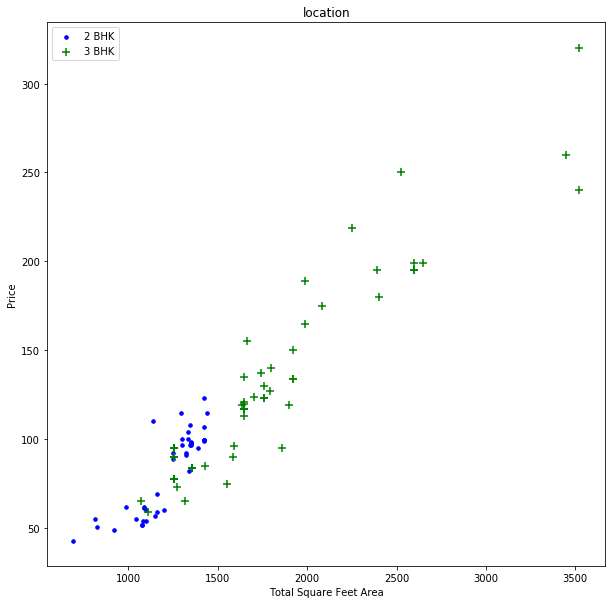

In [59]:
plot_scatter_chart(df7, 'Hebbal')

Some cases have 2 bhk with more price  than 3 bhk for same location. We can remove these outliers.

In [62]:
# Function to remove outliers related to 2bhk and 3 bhk.

def remove_bhk_outliers(df):
    drop_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std'  : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            } 
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                drop_indices = np.append(drop_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(drop_indices, axis = 'index')

In [63]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7342, 7)

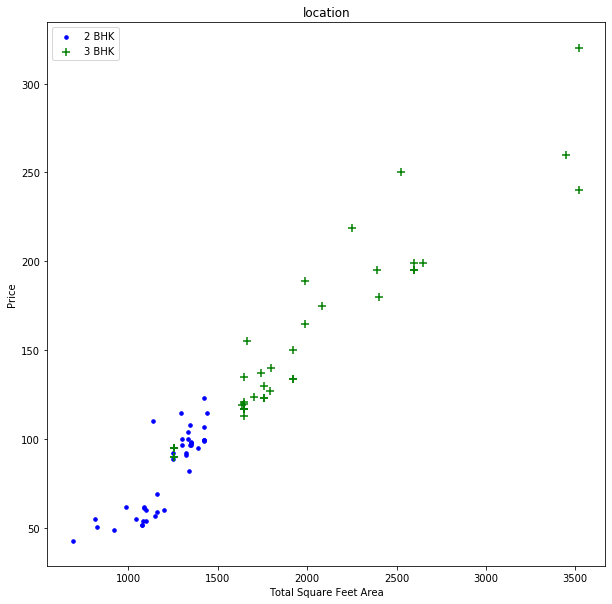

In [64]:
plot_scatter_chart(df8, 'Hebbal')

__Data is almost clean. Let us visulaize histogram of _price_per_sqft_ to get the maximum and minimum cout of prices.__

Text(0, 0.5, 'Count')

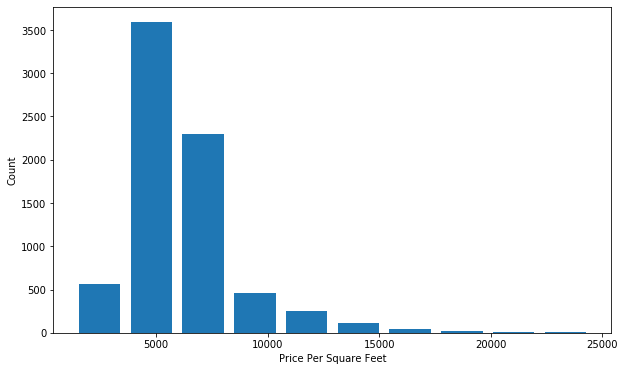

In [65]:
# Plotting histogram of price_per_sqft
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Price_per_sqft has most count till value 10000 and very few count after 15000. 

We will check same for number of bathrooms.

Text(0, 0.5, 'Count')

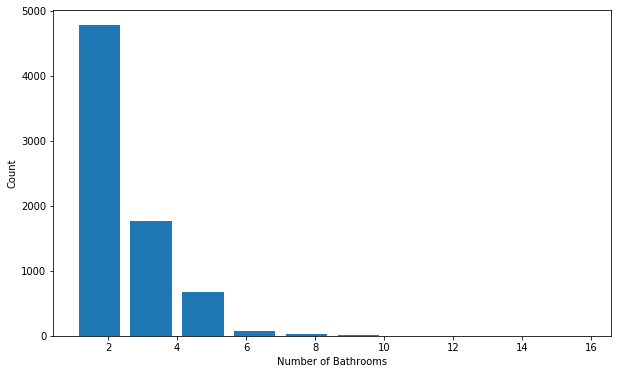

In [68]:
# Plotting histogram of number of bathrooms

plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

Number of Bathrooms has most entries till 6. Let us check if there is any case where number of bathrooms are two more than number of bhk.

In [70]:
len(df8[df8.bath > df8.bhk + 2])

4

In [71]:
df8[df8.bath > df8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


There are 4 cases withnumber of bathrooms are two more than number of bhk and we can remove them without much loss.

In [72]:
df9 = df8[df8.bath < df8.bhk + 2]
df9.shape

(7264, 7)

__Data is very clean now and is ready for training. Let us drop _size_ and _price_per_sqft_ columns as they are not required in training.__

In [75]:
df10 = df9.drop(['size', 'price_per_sqft'], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [76]:
df10.shape

(7264, 5)

Machine Learning Models work only with numbers. Converting values in __Location__ column to digits by creating dummy values for them.

In [104]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dummy values created for location column with 1 corresponding to respective location and other entries as 0.

Creating DataFrame _df11_ by adding _d10_ and _dummies values_.

In [80]:
df11 = pd.concat([df10, dummies], axis = 'columns')
df11.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Data is completely clean and is ready for training.__

## Training the Model

__Preparing train and test data with X as features and Y as labels.__

In [81]:
X = df11.drop(['location', 'price'], axis = 'columns')
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
Y = df11.price
Y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

Spliting the features and labels into 80% training and 20% test data

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [84]:
# Function to predict score
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

Let us try different Machine Learning algorithm and determine which model is the best using _GridSearchCV_.

In [87]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
lr_model = LinearRegression()


cv = ShuffleSplit(n_splits = 5, test_size= 0.2, random_state= 0)
cross_val_score(lr_model, X, Y, cv = cv)
lr_model.fit(x_train, y_train)
lr_model.score(x_test, y_test)

0.8355132544397981

Define a dictionary _algorithm_ and find out the best algorithm with best parameters using GridSearchCV.

In [90]:
from sklearn.model_selection import GridSearchCV

# Function to find out the best algorithm with best parameters using GridSearchCV.
def find_best_model(X, Y):
    algorithm = {
        'Linear Regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        
        'Lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        
        'Decision Tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size= 0.2, random_state= 0)
    for key, values in algorithm.items():
        gs = GridSearchCV(values['model'], values['params'], cv = cv, return_train_score = False)
        gs.fit(X, Y)
        scores.append({
            'model' : key,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

## Results

In [91]:
find_best_model(X, Y)

,model,best_score,best_params
0,Linear Regression,0.845409,{'normalize': True}
1,Lasso,0.719253,"{'alpha': 1, 'selection': 'cyclic'}"
2,Decision Tree,0.753200,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


It turned out that model - __Linear Regression__ has the best score with parameter - __normalize : True__

## Evaluating the Model

Let us evaluate the __Linear Regression__ Model by predicting values.

In [106]:
def predict_price(sqft, bath, bhk, location):
    location_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if location_index >= 0:
        x[location_index] = 1
    
    predicted_price = lr_model.predict([x])[0]
    price_out = 'Price for ' + str(bhk) + ' Bedroom and ' + str(bath) + ' Bathroom in ' + str(location) + ' is : Rs. ' + str(predicted_price) + ' Lakhs'
    return price_out

In [107]:
predict_price(1000, 3,3, 'Indira Nagar')

'Price for 3 Bedroom and 3 Bathroom in Indira Nagar is : Rs. 135.35501098632812 Lakhs'

__I am going to further implement Flask API using _HTML, CSS, Javascript, Python Flask API_ and _Postman_ application in the next Notebook.__